In [2]:
import pandas as pd

In [3]:
#데이터 불러오기
df = pd.read_csv('고객데이테수정.csv')

In [4]:
df.head()

,연번,이름 (Name),생년월일 (Date of Birth),성별 (Gender),휴대폰번호 (Phone Number),이메일 (Email),주소 (Address),아이디 (User ID),가입일 (Registration Date),고객 세그먼트 (Customer Segment),차량구분(vehicle types),구매한 제품 (Purchased Product),제품 구매 날짜 (Purchase Date),거래 금액 (Transaction Amount),거래 방식 (Transaction Method),제품 구매 빈도 (Purchase Frequency),제품 구매 경로 (Purchase Path),연령대,제품 출시년월 (Launch Date)
0,1,강주온,2002-03-04,남,010-6502-8753,janisi@himedia.co.kr,인천광역시 남동구 구월동 88-10,14798,2023-04-01,일반,준중형 세단,Avante (CN7 N),2024-04-04,35170000,카드,1,오프라인,23,2020-05
1,2,김경수,1983-01-02,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,광주광역시 서구 치평동 14-7,kyoungsoo031,2025-02-09,vip,준대형 세단,G80 (RG3),2025-02-10,85790000,카드,5,오프라인,42,2020-03
2,3,김다은,1999-05-02,여,010-6789-0123,kimdaeun26@himedia.co.kr,부산광역시 해운대구 우동 101-12,daeun026,2025-02-28,신규,중형 suv,NEXO (FE),2025-03-10,69500000,현금,1,오프라인,26,2018-01
3,4,김민수,1960-07-01,남,010-1234-5678,kimminsu1@himedia.co.kr,전라남도 목포시 부주동 77-8,minsu001,2023-04-28,일반,중형 suv,Santa-Fe ™,2023-05-01,34920000,현금,1,오프라인,65,2018-01
4,5,김승현,1970-03-02,남,010-0123-4567,kimseunghyun20@himedia.co.kr,경기도 수원시 영통구 원천동 12-34,seunghyun020,2023-09-18,이탈가능,중형 세단,G70 (IK),2023-10-01,50230000,카드,1,오프라인,55,2017-09


In [5]:
df.columns

Index(['연번', '이름 (Name)', '생년월일 (Date of Birth)', '성별 (Gender)',
       '휴대폰번호 (Phone Number)', '이메일 (Email)', '주소 (Address)', '아이디 (User ID)',
       '가입일 (Registration Date)', '고객 세그먼트 (Customer Segment)',
       '차량구분(vehicle types)', '구매한 제품 (Purchased Product)',
       '제품 구매 날짜 (Purchase Date)', '거래 금액 (Transaction Amount)',
       '거래 방식 (Transaction Method)', '제품 구매 빈도 (Purchase Frequency)',
       '제품 구매 경로 (Purchase Path)', '연령대', '제품 출시년월 (Launch Date)'],
      dtype='object')

In [ ]:
#년, 월 분리


In [ ]:
#데이터 전처리
#범주형데이터, 스케일링 필요한 숫자데이터로 나누기
num_features = df[['연령대','거래 금액 (Transaction Amount)','제품 구매 빈도 (Purchase Frequency)']]
str_features = df[['성별 (Gender)', '차량구분(vehicle types)','거래 방식 (Transaction Method)','제품 출시년월 (Launch Date)']]


In [25]:
#데이터 인코딩
from sklearn.preprocessing import OneHotEncoder

#str_features를 one-hot encoding
encoder=OneHotEncoder()
encoder.fit(str_features)
str_features = encoder.transform(str_features)
str_features


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1168 stored elements and shape (292, 29)>

In [ ]:
#희소 행렬 사용 = 원-핫 인코딩 결과 대부분의 값이 0이기 때문에 희소 행렬을 사용하여 메모리를 절약할 수 있음

In [ ]:
#데이터 정규화
from sklearn.preprocessing import StandardScaler
#데이터의 평균을 0, 분산을 1로 변경하여 데이터의 분포를 표준 정규 분포로 만들어줌

scaler = StandardScaler()
scaler.fit(num_features)
num_features = scaler.transform(num_features)
num_features

array([[-1.63960942, -1.2419593 , -1.16703387],
       [-0.3048254 ,  1.46382536,  1.49007248],
       [-1.42885405,  0.59307798, -1.16703387],
       [ 1.31096577, -1.25532252, -1.16703387],
       [ 0.60844787, -0.43695897, -1.16703387],
       [ 1.38121756, -0.43695897, -1.16703387],
       [-1.35860226, -0.74858924, -1.16703387],
       [ 0.18693713, -1.63430343, -1.16703387],
       [-0.09407003, -0.74858924, -1.16703387],
       [ 0.11668534,  0.18255988, -1.16703387],
       [-0.79658793,  2.2057513 ,  1.49007248],
       [-0.65608435, -0.6641337 , -0.50275728],
       [-1.28835047, -1.2419593 , -1.16703387],
       [-1.21809868, -1.25532252, -0.50275728],
       [-0.09407003, -1.2419593 ,  0.16151931],
       [-0.44532898, -0.3204317 , -1.16703387],
       [ 0.88945503, -1.25532252, -1.16703387],
       [ 0.32744071, -1.01050834, -1.16703387],
       [ 0.46794429, -0.3204317 , -1.16703387],
       [-0.65608435, -0.3204317 , -1.16703387],
       [-0.37507719, -0.43695897, -1.167

In [ ]:
#num_features, str_features 합쳐 X로 만들기
import numpy as np

X = np.concatenate([num_features, str_features.toarray()], axis=1)
#수평으로 연결


In [19]:
X

array([[-1.63960942, -1.2419593 , -1.16703387, ...,  0.        ,
         0.        ,  0.        ],
       [-0.3048254 ,  1.46382536,  1.49007248, ...,  0.        ,
         0.        ,  0.        ],
       [-1.42885405,  0.59307798, -1.16703387, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.74895145, -0.98966172, -0.50275728, ...,  0.        ,
         0.        ,  0.        ],
       [-0.37507719, -0.74164037, -0.50275728, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.31096577, -0.77264304,  1.49007248, ...,  0.        ,
         0.        ,  0.        ]])

In [29]:
from sklearn.cluster import KMeans

In [ ]:
#엘보우 방법으로 클러스터 개수 정하기
wcss = [] #Within-Cluster-Sum-of-Squares

for i in range(1, 10+1): #1~10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

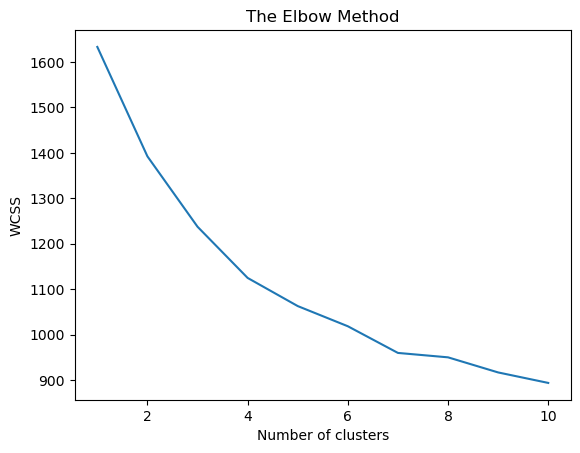

In [ ]:
import matplotlib.pyplot as plt #맷플로립 라이브러리
plt.plot(range(1, 10+1), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
# 클러스터링 7개로 설정
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)


In [34]:
df['cluster'] = y_kmeans
df.head()

,연번,이름 (Name),생년월일 (Date of Birth),성별 (Gender),휴대폰번호 (Phone Number),이메일 (Email),주소 (Address),아이디 (User ID),가입일 (Registration Date),고객 세그먼트 (Customer Segment),차량구분(vehicle types),구매한 제품 (Purchased Product),제품 구매 날짜 (Purchase Date),거래 금액 (Transaction Amount),거래 방식 (Transaction Method),제품 구매 빈도 (Purchase Frequency),제품 구매 경로 (Purchase Path),연령대,제품 출시년월 (Launch Date),cluster
0,1,강주온,2002-03-04,남,010-6502-8753,janisi@himedia.co.kr,인천광역시 남동구 구월동 88-10,14798,2023-04-01,일반,준중형 세단,Avante (CN7 N),2024-04-04,35170000,카드,1,오프라인,23,2020-05,2
1,2,김경수,1983-01-02,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,광주광역시 서구 치평동 14-7,kyoungsoo031,2025-02-09,vip,준대형 세단,G80 (RG3),2025-02-10,85790000,카드,5,오프라인,42,2020-03,6
2,3,김다은,1999-05-02,여,010-6789-0123,kimdaeun26@himedia.co.kr,부산광역시 해운대구 우동 101-12,daeun026,2025-02-28,신규,중형 suv,NEXO (FE),2025-03-10,69500000,현금,1,오프라인,26,2018-01,5
3,4,김민수,1960-07-01,남,010-1234-5678,kimminsu1@himedia.co.kr,전라남도 목포시 부주동 77-8,minsu001,2023-04-28,일반,중형 suv,Santa-Fe ™,2023-05-01,34920000,현금,1,오프라인,65,2018-01,4
4,5,김승현,1970-03-02,남,010-0123-4567,kimseunghyun20@himedia.co.kr,경기도 수원시 영통구 원천동 12-34,seunghyun020,2023-09-18,이탈가능,중형 세단,G70 (IK),2023-10-01,50230000,카드,1,오프라인,55,2017-09,4


In [35]:
df['cluster'].value_counts()

cluster
0    54
2    48
4    47
3    41
5    37
1    35
6    30
Name: count, dtype: int64

In [36]:
#저장
df.to_csv('고객데이터_클러스터링.csv', index=False)

In [ ]:
#새 고객 추가시 클러스터링
new_customer = [[3, 1000000, 10, '남성', '승용차', '오프라인', '2021-01']]
new_customer = pd.DataFrame(new_customer, columns=['연령대', '거래 금액 (Transaction Amount)', '제품 구매 빈도 (Purchase
Frequency)',